# GROUP-2

## Members
#### 1.Nyarko Rudolf-11297285
#### 2.Mensah Erskine - 11293368
#### 3.Jacob Kofi Ababio Agyemang-Prempeh- 11136489
#### 4.Johnson Saka - 11037486
#### 5.Kuuku Ampah - 11259806
#### 6.Theoford Nana Gyanfosu - 11303292
#### 7.Osafo Jayden John Boamah-11252890
#### 8.Beatrice Sophia Nhyira Yawson- 11151818
#### 9.Ama Addae Montford - 11034645
#### 10.Obed Sarkodie - 11041617


## Brute-Force Password Cracking Simulation

This notebook illustrates the process of brute-force password cracking by simulating attempts to discover various password types:

*   4-digit numeric codes
*   6-digit numeric codes
*   4-character alphanumeric passwords (case-sensitive)
*   6-character alphanumeric passwords (case-sensitive)

**For each scenario, we will:**

*  Outline the methodology.
*  Provide the Python code.
*  Execute tests on 500 randomly generated codes.
*  Visualize the distribution of cracking durations.

### Importing Libraries needed

In [1]:
import random
import time
import matplotlib.pyplot as plt
import itertools
import string

%matplotlib inline

### 4-Digit PIN Brute-Force Cracking

- The brute-force cracking of a 4-digit PIN is demonstrated by iterating through all 10,000 possibilities ("0000" to "9999").
- The time taken to discover the correct PIN is recorded.

#### This algorithm sequentially generates every 4-digit code from "0000" to "9999" and checks it against the target.


In [2]:
def crack_four_digit_pin(target_pin: str) -> float:
  
    time_start = time.perf_counter()
    for num in range(10000):  # From 0000 to 9999
        guess_code = str(num).zfill(4)
        if guess_code == target_pin:
            break
    time_finish = time.perf_counter()
    return time_finish - time_start




#### Quick test with a known PIN:


In [3]:
sample_pin = "234"
print(f"Time to crack {sample_pin}: {crack_four_digit_pin(sample_pin):.6f} seconds")

Time to crack 234: 0.004635 seconds


In [4]:
sample_pin = "5234"
print(f"Time to crack {sample_pin}: {crack_four_digit_pin(sample_pin):.6f} seconds")

Time to crack 5234: 0.002415 seconds


#### Task: Generate 500 random 4-digit PINs and record the cracking times

In [5]:
# Generate 500 random 4-digit PINs and record the cracking times
time_results_pin4 = []
random_pin_list = [str(random.randint(0, 9999)).zfill(4) for _ in range(500)]

for pin_code in random_pin_list:
    duration = crack_four_digit_pin(pin_code)
    time_results_pin4.append(duration)




#### Graph

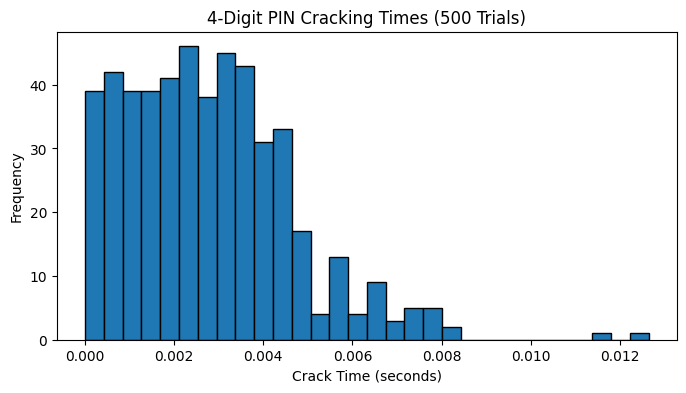

In [6]:

plt.figure(figsize=(8, 4))
plt.hist(time_results_pin4, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("4-Digit PIN Cracking Times (500 Trials)")
plt.show()

### 6-Digit PIN Brute-Force Cracking
- This algorithm exhaustively searches all 6-digit codes within the range "000000" to "999999".

In [7]:
def crack_six_digit_pin(target_code: str) -> float:
  
    start_moment = time.perf_counter()
    for num in range(1000000):  # From 000000 to 999999
        code_guess = str(num).zfill(6)
        if code_guess == target_code:
            break
    end_moment = time.perf_counter()
    return end_moment - start_moment




##### Quick test

In [8]:

sample_pin6 = "654321"
print(f"Time to crack {sample_pin6}: {crack_six_digit_pin(sample_pin6):.6f} seconds")

Time to crack 654321: 0.391168 seconds


### Task

- **Generate 500 random 6-digit PINs and measure brute-force cracking times.**
- **Plot the distribution of cracking times.**

In [9]:
time_results_pin6 = []
random_pin6_list = [str(random.randint(0, 999999)).zfill(6) for _ in range(500)]

for pin_code in random_pin6_list:
    duration = crack_six_digit_pin(pin_code)
    time_results_pin6.append(duration)

#### Graph

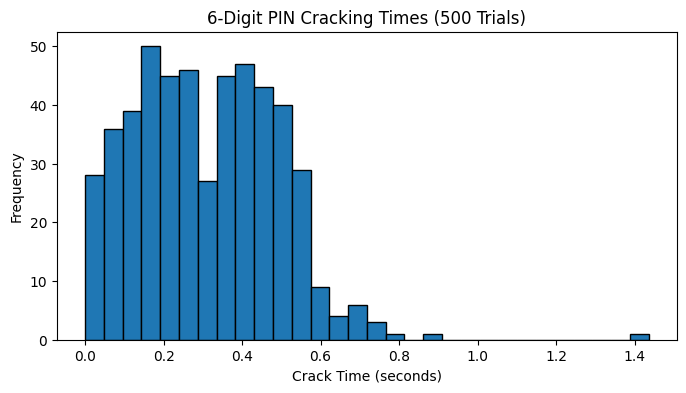

In [10]:
plt.figure(figsize=(8, 4))
plt.hist(time_results_pin6, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("6-Digit PIN Cracking Times (500 Trials)")
plt.show()

###  4-Character Alphanumeric Brute-Force Cracking

- This generates every possible 4-character string using a 62-character set (26 uppercase + 26 lowercase + 10 digits).


In [11]:
def crack_alpha4(target_str: str) -> float:
    
    charset = string.ascii_letters + string.digits
    initial_time = time.perf_counter()
    for combo in itertools.product(charset, repeat=4):
        guess_str = ''.join(combo)
        if guess_str == target_str:
            break
    final_time = time.perf_counter()
    return final_time - initial_time




##### Quick test with a known alphanumeric code:


In [12]:
sample_alpha4 = "aB3d"
print(f"Time to crack {sample_alpha4}: {crack_alpha4(sample_alpha4):.6f} seconds")

Time to crack aB3d: 0.049565 seconds


### Task:
- **Function to generate a random alphanumeric code of a given length**

In [ ]:
def gen_random_alpha_code(length: int) -> str:
    charset = string.ascii_letters + string.digits
    return ''.join(random.choice(charset) for _ in range(length))

# Generate 500 random 4-character alphanumeric codes and record the times
time_results_alpha4 = []
random_alpha4_list = [gen_random_alpha_code(4) for _ in range(500)]

for code_str in random_alpha4_list:
    duration = crack_alpha4(code_str)
    time_results_alpha4.append(duration)

#### Graph

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(time_results_alpha4, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("4-Character Alphanumeric Cracking Times (500 Trials)")
plt.show()

### 6-Character Alphanumeric Brute-Force Cracking

- Because the search space (62^6) is enormous, we include a maximum number of trials (max_trials)
to prevent excessive computation during demonstration.


In [ ]:
def crack_alpha6(target_str: str, max_trials: int = 1000000) -> float:

    charset = string.ascii_letters + string.digits
    start_instant = time.perf_counter()
    trial_count = 0
    for combo in itertools.product(charset, repeat=6):
        trial_count += 1
        guess_str = ''.join(combo)
        if guess_str == target_str or trial_count >= max_trials:
            break
    end_instant = time.perf_counter()
    return end_instant - start_instant




##### Quick test with a sample alphanumeric 6-character code (using the trial cap):


In [ ]:
sample_alpha6 = "Ab3dE1"
print(f"Time to crack (attempt) {sample_alpha6}: {crack_alpha6(sample_alpha6):.6f} seconds")

### Task: 
-  Generate 500 random 6-character alphanumeric codes and record the cracking times (with cap)

In [ ]:
time_results_alpha6 = []
random_alpha6_list = [gen_random_alpha_code(6) for _ in range(500)]

for code_str in random_alpha6_list:
    duration = crack_alpha6(code_str, max_trials=1000000)
    time_results_alpha6.append(duration)


#### Graph

In [ ]:

plt.figure(figsize=(8, 4))
plt.hist(time_results_alpha6, bins=30, edgecolor='black')
plt.xlabel("Crack Time (seconds)")
plt.ylabel("Frequency")
plt.title("6-Character Alphanumeric Cracking Times (500 Trials, capped at 1e6 trials)")
plt.show()

## Conclusion

**This study examined the computational cost of brute-force cracking for various code types:**
- 4-digit PINs **(10,000 possibilities)** 
- 6-digit PINs **(1,000,000 possibilities)** 
- 4-character alphanumeric codes **(14.7 million combinations)** 
- 6-character alphanumeric codes **(capped search of 62^6 possibilities)**. 
                                  
**As expected, search time increased dramatically with the search space size, highlighting the vulnerability of simple codes to brute-force attacks.
 These results emphasize the need for strong passwords and robust cryptographic practices.**
